# Homework 5


## Part I

### Q1

![title](images/belief.jpg)
![title](images/factor.jpg)


[1]

### Q2 

The expression for the full joint distribution is
$$p(x_{0:T},A,R)=p(A)p(R)p(x_0)\prod_{t=1}^{T}p(x_t|x_{t-1},A,R)$$

and the terms can be assigned to the factors as

\begin{eqnarray}
f_{-1}&=&p(A|\theta_A)\\
f_{-2}&=&p(R|\theta_R)\\
f_0&=&p(x_0)\\
f_i&=&p(x_i|x_{i-1},A,R), i \geq 1
\end{eqnarray}

The factors for the hidden variable $\theta$ has not been shown explicitly in the factor graph, since, well, they ought to be hidden. :)

### Q3

\begin{eqnarray}
p(A|R,x_0,x_1)&=&\frac{p(R,x_0,x_1|A)p(A)}{p(R,x_0,x_1)}\\
&=&\frac{p(x_1|R,x_0,A)p(R)p(x_0)p(A)}{p(R,x_0,x_1)} &&\text{$x_0$ and $R$ are conditionally independent of A}\\
&=&\frac{p(x_1|R,x_0,A)p(R)p(x_0)p(A)}{\int_{-\infty}^{\infty}p(A,R,x_0,x_1)dA}\\
&=&\frac{p(x_1|R,x_0,A)p(R)p(x_0)p(A)}{\int_{-\infty}^{\infty}p(A)p(R)p(x_0)p(x_1|x_0,A,R)dA}\\
&=&\frac{p(x_1|R,x_0,A)p(R)p(x_0)p(A)}{p(R)\int_{-\infty}^{\infty}p(A)p(x_0)p(x_1|x_0,A,R)dA} &&\text{$p(R)$ does not contain terms in A}\\
&=&\frac{p(x_1|R,x_0,A)p(A)}{\int_{-\infty}^{\infty}p(A)p(x_1|x_0,A,R)dA} &&\text{$x_0$ is assumed to be given since no distribution is associated with it}\\
\end{eqnarray}

The derivation of $p(R|A,x_0,x_1)$ is similar, with the only difference being in the limits of the integral. Since $R$ has Inverse Gamma distribution, and it only assumes positive values, the integral should be taken from $0$ to infinity.

### Q4

\begin{eqnarray}
p(A,R,x_0=1,x_1=-6)&=&p(x_1=-6|x_0=1, A, R)p(x_0,A,R)&\text{}\\
&=&\mathcal{N}(x;A,R)p(x_0=1,A,R)&\text{$x_0=1, Ax_0=A$}\\
&=&\mathcal{N}(x;A,R)p(x_0=1|A,R)p(A,R)&\text{}\\
&=&\mathcal{N}(x;A,R)p(A,R)&\text{$x_0$ is given and conditionally independent of A and R}\\
&=&\mathcal{N}(x;A,R)p(A)p(R)&\text{A and R are conditionally independent}\\
&=&\mathcal{N}(x;A,R)\mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250)&\text{}
\end{eqnarray}

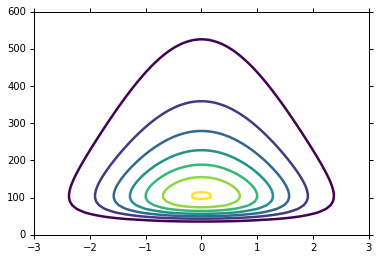

In [20]:
%matplotlib inline
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
N=1000

X = np.linspace(-10.0, 10.0, N)
Y = np.linspace(10**-4, 10**4, N)
x , y = np.meshgrid(X,Y)

z = sp.norm.pdf(x, 0, 1.2)*sp.invgamma.pdf(y, 0.4, scale=250)*sp.norm.pdf(-6, x, y)

plt.contour(x,y,z)
axes = plt.gca()
axes.set_xlim([-3,3])
axes.set_ylim([0,600])
plt.show()

## Part II

### Q3

We implement a special case of ICM, namely Gibbs Sampler [2]. Actually, you implement the Gibbs Sampler and I translated it from Octave to Python, with minor arithmetic arrangements [3].

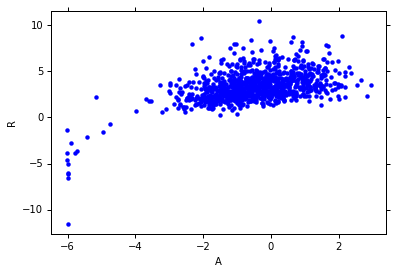

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

nu = 0.4; beta = 100
nu_beta = nu/beta;  P = 1.2; x_0 = 1; x_1 = -6
T = 1000
R = np.zeros(T)
A = np.zeros(T); A[0] = -6; R[0] = 0.00001

for t in range(1,T):
    Sig = 1/(1/P + x_0**2/R[t-1])
    mu = (Sig*x_0*x_1)/R[t-1]
    A[t] = np.sqrt(Sig)*np.random.randn() + mu
    b = 0.5*(x_1**2 - 2*x_1*x_0*A[t] + x_0**2*A[t]**2) + nu_beta
    R[t] = 1/(np.random.gamma(nu+0.5, 1/b))

log_R = np.log(R)

plt.scatter(A,log_R)
plt.xlabel('A')
plt.ylabel('R')
plt.show()



### Q4

Similarly, translated from [3] with minor arithmetic arrangements.

In [13]:
nu = 0.4; beta = 100; 
nu_beta = nu/beta;  P = 1.2; x_0 = 1; x_1 = -6;
T = 300;
E_A = -6; 
E_A2 = E_A**2;
E_invR = 1/0.00001;

for t in range(T):
    Sig = 1/(1/P + x_0**2*E_invR);
    mu = Sig*x_0*x_1*E_invR;

    E_A = mu;
    E_A2 = mu**2 + Sig; 
    
    a = nu+0.5;
    b = 0.5*(x_1**2 - 2*x_1*x_0*E_A + x_0**2*E_A2) + nu_beta;

    E_invR = a/b;

print(E_A)

print(E_invR)

-0.3704347574553939
0.05483471954102366


## References:

[1] Course slides https://dl.dropboxusercontent.com/u/9787379/cmpe58k/bsml-all.pdf
[2] Course Slide https://www.cs.ubc.ca/~schmidtm/Courses/540-W17/L15.pdf
[3] Course note on AR https://github.com/atcemgil/notes/blob/master/AR1-Model-Octave.ipynb